#### **Imports**

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gamma
from scipy.integrate import quad
from matplotlib.ticker import AutoMinorLocator
from tqdm import tqdm

colors = ['crimson','midnightblue', 'magenta','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

#### **Problem 2**

In [75]:
def likelihood(x,alpha,beta):
    return gamma.pdf(x, a=alpha, scale=(1/beta)) # Use SciPy's own gamma PDF

def prior(x): # Prior having integrated and found N = 2.93
    if 0 < x <= 1.6:
        return 1 / 2.93
    elif 1.6 < x <= 2.1:
        return 2.66 / 2.93
    else:
        return 0

def posterior(x,alpha,beta):
    return likelihood(x,alpha,beta)*prior(x)

In [76]:
alpha , beta = 2 , 2

Likeli , Prio , Prob = [] , [] , [] # Empty lists

x_space = np.linspace(0.002,4,200,endpoint=False) # Generate x-values from 0 < x < 4

for i in tqdm(x_space): # Loop across x-values
    Likeli.append(likelihood(i,alpha=alpha,beta=beta))
    Prio.append(prior(i))
    Prob.append(posterior(i,alpha=alpha,beta=beta))

100%|██████████| 200/200 [00:00<00:00, 924.11it/s]


In [77]:
Likelihood_func = lambda x: likelihood(x,alpha,beta)
Likelihood_area, _ = quad(Likelihood_func,x_space[0],x_space[-1])

Posterior_func = lambda x: posterior(x,alpha,beta)
Posterior_area, _ = quad(Posterior_func,x_space[0],x_space[-1])

mode_index = np.argmax(Prob) # Get the index of the greatest posterior probability
mode_x = x_space[mode_index] # Get the x-value of greatest probability

print(f'The mode of the posterior is {mode_x:.03} and has a corresponding normalized probability of {Prob[mode_index]/Posterior_area:.03}') 

The mode of the posterior is 0.502 and has a corresponding normalized probability of 0.683


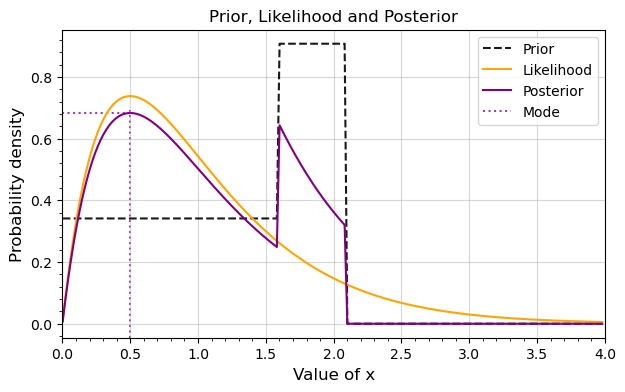

In [78]:
plt.figure(figsize=(7,4))

plt.plot(x_space,Prio,alpha=.9,linestyle='--',color='k',label='Prior')
plt.plot(x_space,Likeli / np.float32(Likelihood_area),alpha=1.,linestyle='-',color='orange',label='Likelihood')
plt.plot(x_space,Prob / np.float32(Posterior_area),alpha=1.,linestyle='-',color='purple',label='Posterior')

plt.axvline(mode_x,ymax=(Prob[mode_index]/np.float32(Posterior_area))*1.08, alpha=0.75,color='purple', linestyle=':', label=f'Mode',zorder=0)
plt.axhline(y=(Prob[mode_index]/np.float32(Posterior_area)),xmax=mode_x/4, alpha=0.75,color='purple', linestyle=':',zorder=0)

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('Prior, Likelihood and Posterior',fontsize=12)
plt.xlabel('Value of x',fontsize=12)
plt.ylabel('Probability density',fontsize=12)
plt.grid(True,alpha=0.5,zorder=-10)
ax.set_axisbelow(True)
#plt.ylim(0,1.)
plt.xlim(0,4)
plt.legend()
plt.savefig('Problem2.pdf')
plt.show()

In [79]:
print(f'The other significant peak has a value of {posterior(1.6,alpha,beta)/Posterior_area:.03}')

The other significant peak has a value of 0.242
